In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# First EDA Function
def perform_eda(df):
    print("=== EXPLORATORY DATA ANALYSIS ===")
    print("=" * 50)

    print("\n1. Basic Data Info:")
    print(f"Total rows: {len(df)}")
    print(f"Total columns: {len(df.columns)}")

    print("\n2. Missing Values:")
    print(df.isnull().sum())

    print("\n3. CallStatus Distribution:")
    status_dist = df['CallStatus'].value_counts()
    print(status_dist)
    print("\nPercentage Distribution:")
    print((status_dist/len(df)*100).round(2))

    print("\n4. Unique Values in Key Columns:")
    print(f"Number of unique widgets: {df['WidgetName'].nunique()}")
    print(f"Number of unique debt levels: {df['DebtLevel'].nunique()}")

    # Create visualizations
    plt.figure(figsize=(15, 10))

    # Plot 1: Call Status Distribution
    plt.subplot(2, 2, 1)
    df['CallStatus'].value_counts().plot(kind='bar')
    plt.title('Call Status Distribution')
    plt.xticks(rotation=45)

    # Plot 2: Lead Quality Over Time
    plt.subplot(2, 2, 2)
    df['LeadCreated'] = pd.to_datetime(df['LeadCreated'])
    df.groupby(df['LeadCreated'].dt.date)['CallStatus'].count().plot(kind='line')
    plt.title('Leads Over Time')

    # Plot 3: Debt Level Distribution
    plt.subplot(2, 2, 3)
    df['DebtLevel'].value_counts().plot(kind='bar')
    plt.title('Debt Level Distribution')
    plt.xticks(rotation=45)

    # Plot 4: Widget Distribution
    plt.subplot(2, 2, 4)
    df['WidgetName'].value_counts().head(10).plot(kind='bar')
    plt.title('Top 10 Widgets')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return df



=== EXPLORATORY DATA ANALYSIS ===

1. Basic Data Info:
Total rows: 3021
Total columns: 24

2. Missing Values:
LeadCreated                       0
FirstName                         0
Email                             0
VendorLeadID                      8
CallStatus                     2140
WidgetName                        0
PublisherZoneName                 0
PublisherCampaignName             0
AddressScore                   1850
PhoneScore                     1628
AdvertiserCampaignName            0
State                             0
DebtLevel                         0
IP Address                     3021
Partner                           0
ReferralDomain                  515
MarketingCampaign               272
AdGroup                         272
Keyword                        2042
SearchQuery                    1756
ReferralURL                     515
ReferralURL Parameters          738
LandingPageURL                    0
Landing Page URL Parameters       0
dtype: int64

3. CallStatu

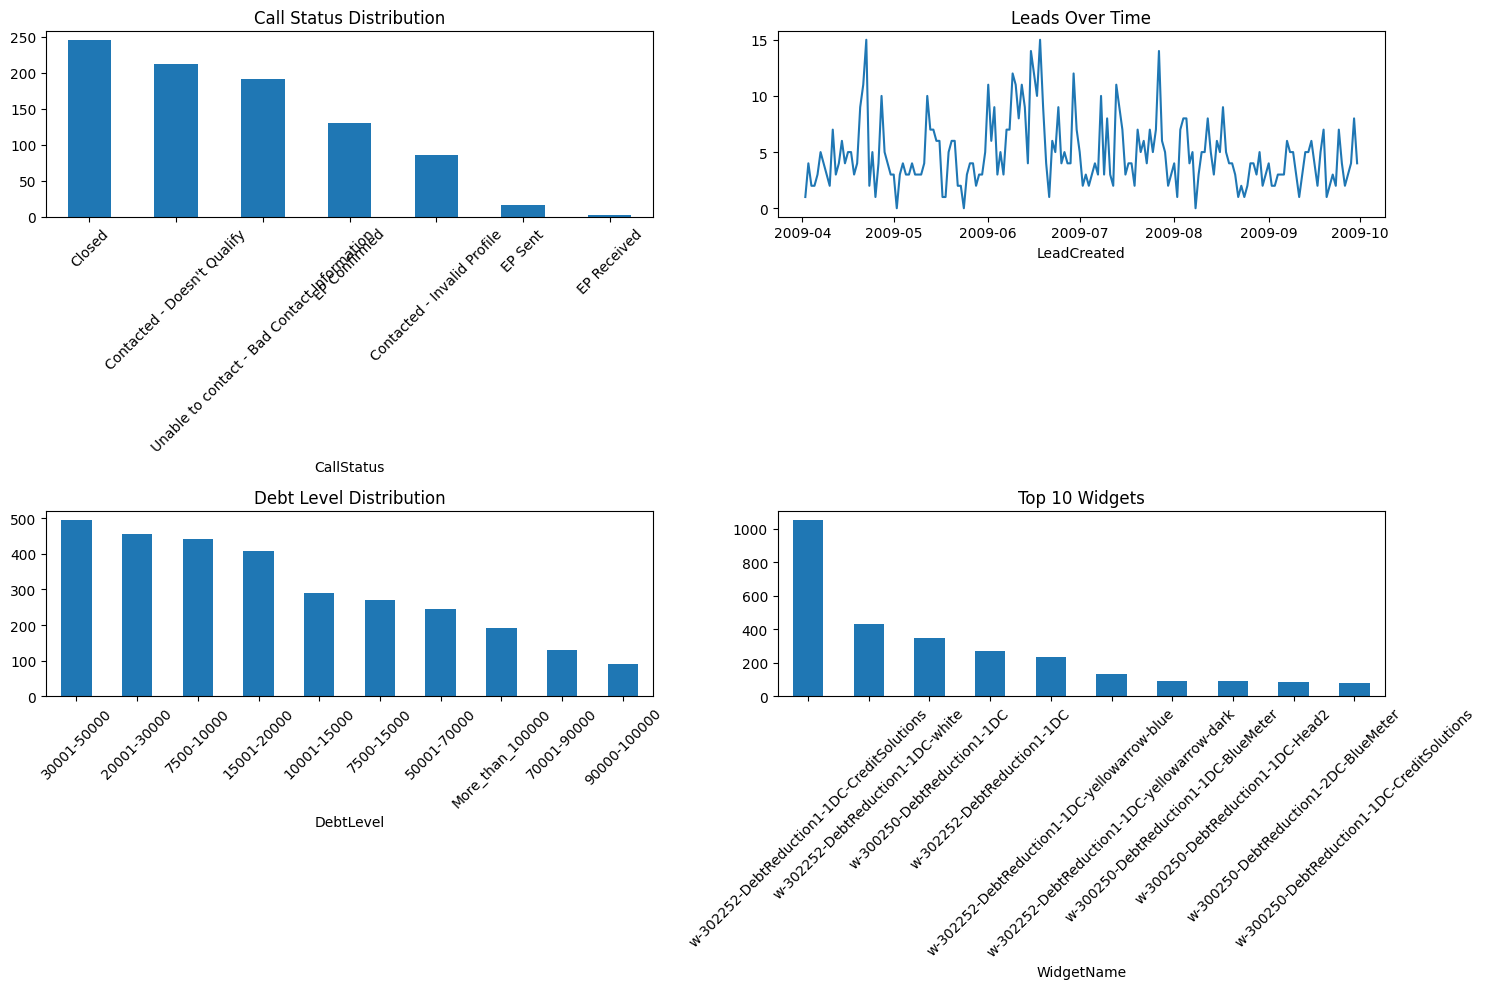

In [ ]:
# Main execution
if __name__ == "__main__":
    # Read data
    df = pd.read_excel('Analyst case study dataset 1.xls')

    # Run EDA
    df = perform_eda(df)

=== LEAD QUALITY TREND ANALYSIS ===

Monthly Trends:
     Month  TotalLeads  Closed  Good  Bad  ClosedRate  GoodRate  BadRate
0  2009-04         518      56    23   57       10.81      4.44    11.00
1  2009-05         580      37    22   57        6.38      3.79     9.83
2  2009-06         609      63    23  141       10.34      3.78    23.15
3  2009-07         532      33    16  110        6.20      3.01    20.68
4  2009-08         438      41    21   67        9.36      4.79    15.30
5  2009-09         344      15    43   56        4.36     12.50    16.28

Statistical Analysis:
Closed Rate Correlation: -0.560 (p-value: 0.248)
Good Quality Correlation: 0.642 (p-value: 0.169)
Bad Quality Correlation: 0.412 (p-value: 0.417)


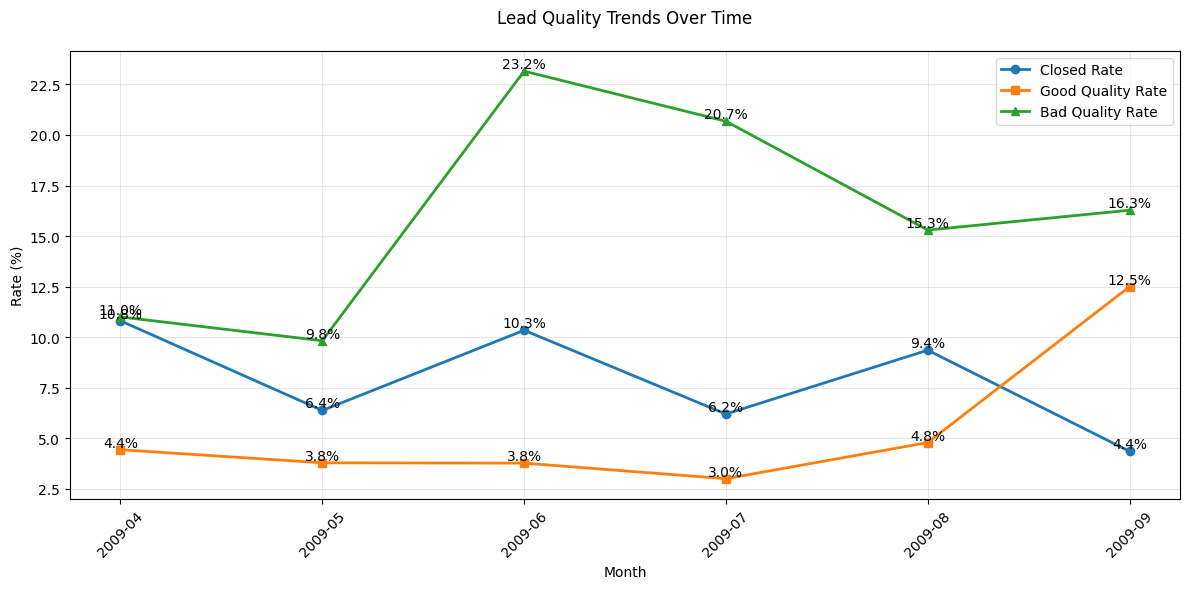

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def analyze_lead_trends(df):
    # 1. Prepare the data
    df['LeadCreated'] = pd.to_datetime(df['LeadCreated'])
    df['Month'] = df['LeadCreated'].dt.strftime('%Y-%m')

    # 2. Define quality categories
    closed_status = ['Closed']
    good_quality_status = ['EP Sent', 'EP Received', 'EP Confirmed']
    bad_quality_status = ['Unable to contact - Bad Contact Information',
                         'Contacted - Invalid Profile',
                         "Contacted - Doesn't Qualify"]

    # 3. Calculate monthly metrics
    monthly_trends = df.groupby('Month').agg({
        'LeadCreated': 'count',  # Total leads
        'CallStatus': [
            ('Closed', lambda x: sum(x == 'Closed')),
            ('Good', lambda x: sum(x.isin(good_quality_status))),
            ('Bad', lambda x: sum(x.isin(bad_quality_status)))
        ]
    }).reset_index()

    # Clean up column names
    monthly_trends.columns = ['Month', 'TotalLeads', 'Closed', 'Good', 'Bad']

    # Calculate rates
    monthly_trends['ClosedRate'] = monthly_trends['Closed'] / monthly_trends['TotalLeads'] * 100
    monthly_trends['GoodRate'] = monthly_trends['Good'] / monthly_trends['TotalLeads'] * 100
    monthly_trends['BadRate'] = monthly_trends['Bad'] / monthly_trends['TotalLeads'] * 100

    # Statistical tests
    months = range(len(monthly_trends))
    closed_correlation, closed_pvalue = stats.pearsonr(months, monthly_trends['ClosedRate'])
    good_correlation, good_pvalue = stats.pearsonr(months, monthly_trends['GoodRate'])
    bad_correlation, bad_pvalue = stats.pearsonr(months, monthly_trends['BadRate'])

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_trends['Month'], monthly_trends['ClosedRate'],
             marker='o', label='Closed Rate', linewidth=2)
    plt.plot(monthly_trends['Month'], monthly_trends['GoodRate'],
             marker='s', label='Good Quality Rate', linewidth=2)
    plt.plot(monthly_trends['Month'], monthly_trends['BadRate'],
             marker='^', label='Bad Quality Rate', linewidth=2)

    # Add value labels
    for i, row in monthly_trends.iterrows():
        plt.text(i, row['ClosedRate'], f'{row["ClosedRate"]:.1f}%', ha='center', va='bottom')
        plt.text(i, row['GoodRate'], f'{row["GoodRate"]:.1f}%', ha='center', va='bottom')
        plt.text(i, row['BadRate'], f'{row["BadRate"]:.1f}%', ha='center', va='bottom')

    plt.title('Lead Quality Trends Over Time', pad=20)
    plt.xlabel('Month')
    plt.ylabel('Rate (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    # Print analysis
    print("=== LEAD QUALITY TREND ANALYSIS ===")
    print("=" * 50)
    print("\nMonthly Trends:")
    print(monthly_trends.round(2))

    print("\nStatistical Analysis:")
    print(f"Closed Rate Correlation: {closed_correlation:.3f} (p-value: {closed_pvalue:.3f})")
    print(f"Good Quality Correlation: {good_correlation:.3f} (p-value: {good_pvalue:.3f})")
    print(f"Bad Quality Correlation: {bad_correlation:.3f} (p-value: {bad_pvalue:.3f})")

    plt.show()

    return monthly_trends

# Run the analysis
df = pd.read_excel('Analyst case study dataset 1.xls')
trends = analyze_lead_trends(df)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def prepare_quality_flags(df):
    # Create quality flags
    df['is_closed'] = df['CallStatus'] == 'Closed'
    df['is_good_quality'] = df['CallStatus'].isin(['EP Sent', 'EP Received', 'EP Confirmed'])
    df['is_bad_quality'] = df['CallStatus'].isin([
        'Unable to contact - Bad Contact Information',
        'Contacted - Invalid Profile',
        "Contacted - Doesn't Qualify"
    ])
    return df

In [ ]:
def analyze_widget_performance(df):
    # Aggregate by widget
    widget_stats = df.groupby('WidgetName').agg({
        'VendorLeadID': 'count',  # Total leads
        'is_closed': 'sum',       # Closed leads
        'is_good_quality': 'sum', # Good quality leads
        'is_bad_quality': 'sum'   # Bad quality leads
    }).reset_index()

    # Calculate rates
    widget_stats['ClosedRate'] = widget_stats['is_closed'] / widget_stats['VendorLeadID'] * 100
    widget_stats['GoodRate'] = widget_stats['is_good_quality'] / widget_stats['VendorLeadID'] * 100
    widget_stats['BadRate'] = widget_stats['is_bad_quality'] / widget_stats['VendorLeadID'] * 100

    # Filter for minimum sample size and sort
    widget_stats = widget_stats[widget_stats['VendorLeadID'] >= 30].sort_values('ClosedRate', ascending=False)

    return widget_stats

In [ ]:
def analyze_debt_levels(df):
    # Aggregate by debt level
    debt_stats = df.groupby('DebtLevel').agg({
        'VendorLeadID': 'count',
        'is_closed': 'sum',
        'is_good_quality': 'sum',
        'is_bad_quality': 'sum'
    }).reset_index()

    # Calculate rates
    debt_stats['ClosedRate'] = debt_stats['is_closed'] / debt_stats['VendorLeadID'] * 100
    debt_stats['GoodRate'] = debt_stats['is_good_quality'] / debt_stats['VendorLeadID'] * 100
    debt_stats['BadRate'] = debt_stats['is_bad_quality'] / debt_stats['VendorLeadID'] * 100

    return debt_stats.sort_values('ClosedRate', ascending=False)

In [ ]:
def plot_quality_drivers(widget_stats, debt_stats):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # Plot top widgets
    top_widgets = widget_stats.head(8)
    bars1 = ax1.bar(range(len(top_widgets)), top_widgets['ClosedRate'])
    ax1.set_title('Top Widget Performance')
    ax1.set_xticks(range(len(top_widgets)))
    ax1.set_xticklabels(top_widgets['WidgetName'], rotation=45, ha='right')

    # Add value labels
    for i, v in enumerate(top_widgets['ClosedRate']):
        ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

    # Plot debt levels
    bars2 = ax2.bar(range(len(debt_stats)), debt_stats['ClosedRate'])
    ax2.set_title('Performance by Debt Level')
    ax2.set_xticks(range(len(debt_stats)))
    ax2.set_xticklabels(debt_stats['DebtLevel'], rotation=45, ha='right')

    # Add value labels
    for i, v in enumerate(debt_stats['ClosedRate']):
        ax2.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_quality_drivers(widget_stats, debt_stats):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    # Plot top widgets
    top_widgets = widget_stats.head(8)
    bars1 = ax1.bar(range(len(top_widgets)), top_widgets['ClosedRate'], color='mediumseagreen')
    ax1.set_title('Top Widget Performance')
    ax1.set_xticks(range(len(top_widgets)))
    ax1.set_xticklabels(top_widgets['WidgetName'], rotation=45, ha='right')

    # Add value labels
    for i, v in enumerate(top_widgets['ClosedRate']):
        ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

    # Plot debt levels
    bars2 = ax2.bar(range(len(debt_stats)), debt_stats['ClosedRate'], color='teal')
    ax2.set_title('Performance by Debt Level')
    ax2.set_xticks(range(len(debt_stats)))
    ax2.set_xticklabels(debt_stats['DebtLevel'], rotation=45, ha='right')

    # Add value labels
    for i, v in enumerate(debt_stats['ClosedRate']):
        ax2.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()



=== QUALITY DRIVERS ANALYSIS ===

Top Performing Widgets:
                                    WidgetName  VendorLeadID  ClosedRate  \
2  w-300250-DebtReduction1-1DC-CreditSolutions            76       15.79   
1        w-300250-DebtReduction1-1DC-BlueMeter            92       14.13   
3            w-300250-DebtReduction1-1DC-Head2            89       12.36   
0                  w-300250-DebtReduction1-1DC           348        9.77   
8                  w-302252-DebtReduction1-1DC           271        8.49   

   GoodRate  BadRate  
2      7.89     6.58  
1      1.09     4.35  
3      3.37     8.99  
0      6.32    22.99  
8      3.32    14.02  

Debt Level Performance:
          DebtLevel  VendorLeadID  ClosedRate  GoodRate  BadRate
5       70001-90000           131       13.74      5.34    12.21
0       10001-15000           291       11.68      6.87    16.84
8      90000-100000            90       10.00      2.22    14.44
4       50001-70000           244        9.02      6.56    13

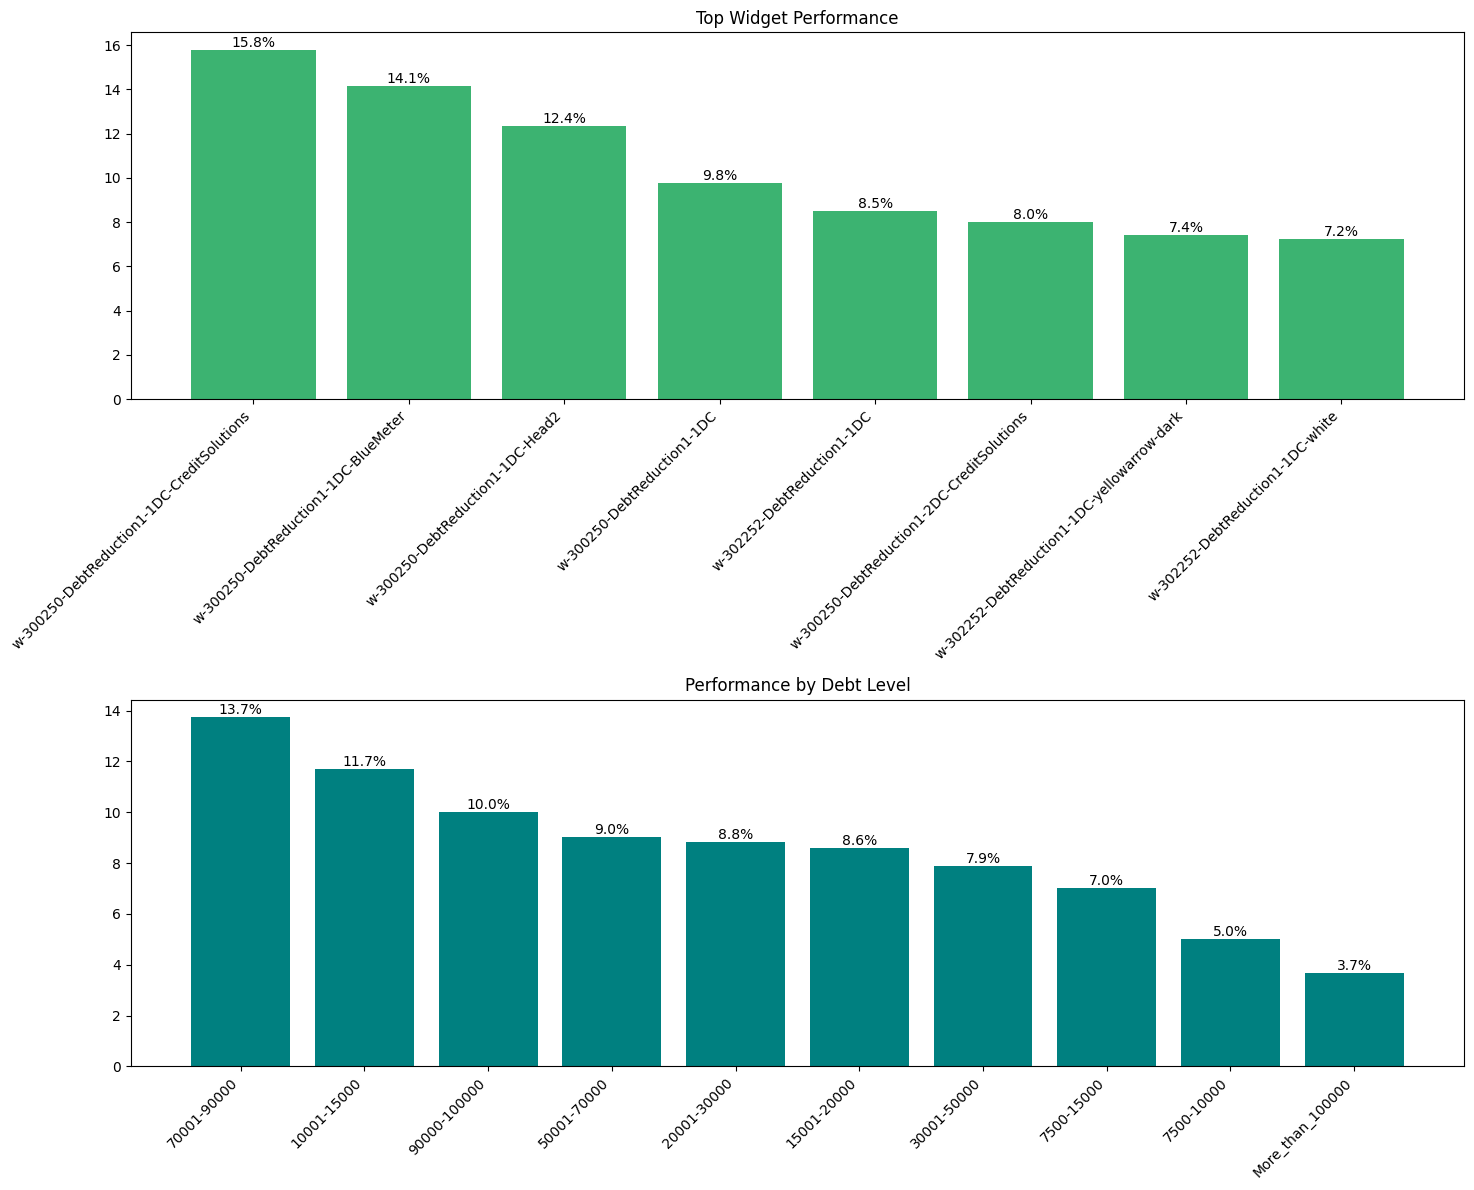

In [ ]:
def main():
    # Read data
    df = pd.read_excel('Analyst case study dataset 1.xls')

    # Prepare data
    df = prepare_quality_flags(df)

    # Analyze segments
    widget_stats = analyze_widget_performance(df)
    debt_stats = analyze_debt_levels(df)

    # Print results
    print("\n=== QUALITY DRIVERS ANALYSIS ===")
    print("=" * 50)

    print("\nTop Performing Widgets:")
    print(widget_stats[['WidgetName', 'VendorLeadID', 'ClosedRate', 'GoodRate', 'BadRate']].head().round(2))

    print("\nDebt Level Performance:")
    print(debt_stats[['DebtLevel', 'VendorLeadID', 'ClosedRate', 'GoodRate', 'BadRate']].round(2))

    # Visualize results
    plot_quality_drivers(widget_stats, debt_stats)

if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_base_metrics(df):
    # Constants
    total_leads = len(df)
    current_cpl = 30
    target_cpl = 33

    # Quality rates
    current_quality_rate = 0.08  # 8.0% as given
    target_quality_rate = 0.096  # 9.6% (20% increase)

    # Cost calculations
    current_total_cost = total_leads * current_cpl
    current_cost_per_quality = current_cpl / current_quality_rate

    target_total_cost = total_leads * target_cpl
    target_cost_per_quality = target_cpl / target_quality_rate

    return {
        'total_leads': total_leads,
        'current_metrics': {
            'cpl': current_cpl,
            'quality_rate': current_quality_rate,
            'total_cost': current_total_cost,
            'cost_per_quality': current_cost_per_quality
        },
        'target_metrics': {
            'cpl': target_cpl,
            'quality_rate': target_quality_rate,
            'total_cost': target_total_cost,
            'cost_per_quality': target_cost_per_quality
        }
    }

In [ ]:
def analyze_improvement_opportunities(df):
    # Find best performing widgets (min 30 leads)
    widget_performance = df.groupby('WidgetName').agg({
        'VendorLeadID': 'count',
        'CallStatus': lambda x: sum(x == 'Closed') / len(x)
    }).reset_index()

    widget_stats = widget_performance[widget_performance['VendorLeadID'] >= 30].copy()
    widget_stats['ConversionRate'] = widget_stats['CallStatus'] * 100

    # Sort by conversion rate
    best_widgets = widget_stats.sort_values('ConversionRate', ascending=False)

    return best_widgets

In [ ]:
def calculate_required_shift(metrics, best_widgets):
    total_leads = metrics['total_leads']
    current_quality = metrics['current_metrics']['quality_rate']
    target_quality = metrics['target_metrics']['quality_rate']

    # Calculate leads needed to shift
    target_quality_leads = total_leads * target_quality
    current_quality_leads = total_leads * current_quality
    additional_leads_needed = target_quality_leads - current_quality_leads

    # Best widget rate
    best_rate = best_widgets.iloc[0]['CallStatus']
    required_shift = additional_leads_needed / best_rate

    return {
        'leads_to_shift': required_shift,
        'best_widget_rate': best_rate,
        'shift_percentage': (required_shift/total_leads) * 100
    }

In [ ]:
def plot_improvement_analysis(metrics, shift_analysis):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Improvement Opportunity Analysis', fontsize=14, fontweight='bold')

    # Plot 1: CPL vs Quality Rate
    states = ['Current', 'Target']
    x = np.arange(len(states))
    width = 0.35

    ax1.bar(x - width/2, [metrics['current_metrics']['cpl'], metrics['target_metrics']['cpl']],
            width, label='CPL ($)', color='#3498db')
    ax1.bar(x + width/2, [metrics['current_metrics']['quality_rate']*100,
                         metrics['target_metrics']['quality_rate']*100],
            width, label='Quality Rate (%)', color='#2ecc71')

    ax1.set_title('CPL vs Quality Rate')
    ax1.set_xticks(x)
    ax1.set_xticklabels(states)
    ax1.legend()

    # Plot 2: Cost per Quality Lead
    costs = [metrics['current_metrics']['cost_per_quality'],
             metrics['target_metrics']['cost_per_quality']]
    ax2.bar(states, costs, color=['#e74c3c', '#27ae60'])
    ax2.set_title('Cost per Quality Lead')

    # Add value labels
    for i, cost in enumerate(costs):
        ax2.text(i, cost, f'${cost:.2f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


=== IMPROVEMENT OPPORTUNITY ANALYSIS ===

Current State:
- CPL: $30.00
- Quality Rate: 8.0%
- Cost per Quality Lead: $375.00

Target State:
- CPL: $33.00
- Quality Rate: 9.6%
- Cost per Quality Lead: $343.75

Required Actions:
- Shift 310 leads (10.3% of volume)
- To widgets performing at 15.6% quality rate


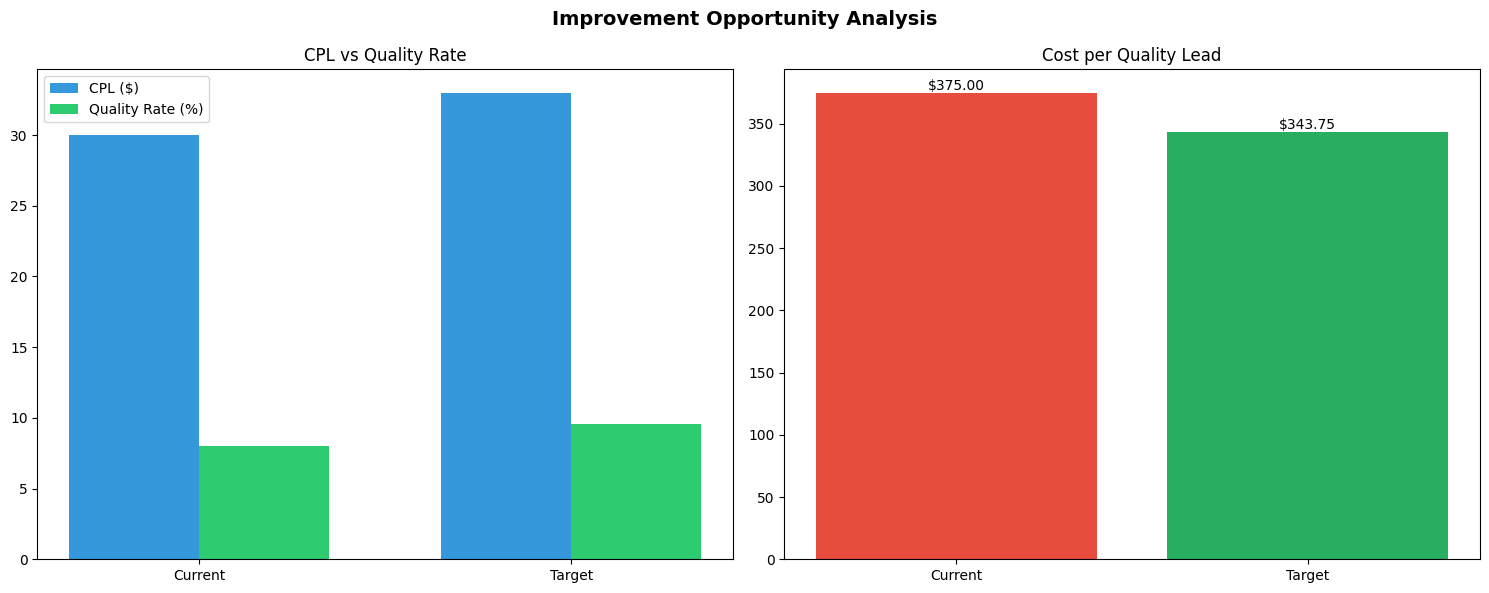

In [ ]:
def main():
    # Read data
    df = pd.read_excel('Analyst case study dataset 1.xls')

    # Calculate metrics
    metrics = calculate_base_metrics(df)
    best_widgets = analyze_improvement_opportunities(df)
    shift_analysis = calculate_required_shift(metrics, best_widgets)

    # Print analysis
    print("\n=== IMPROVEMENT OPPORTUNITY ANALYSIS ===")
    print("=" * 50)

    print("\nCurrent State:")
    print(f"- CPL: ${metrics['current_metrics']['cpl']:.2f}")
    print(f"- Quality Rate: {metrics['current_metrics']['quality_rate']*100:.1f}%")
    print(f"- Cost per Quality Lead: ${metrics['current_metrics']['cost_per_quality']:.2f}")

    print("\nTarget State:")
    print(f"- CPL: ${metrics['target_metrics']['cpl']:.2f}")
    print(f"- Quality Rate: {metrics['target_metrics']['quality_rate']*100:.1f}%")
    print(f"- Cost per Quality Lead: ${metrics['target_metrics']['cost_per_quality']:.2f}")

    print("\nRequired Actions:")
    print(f"- Shift {shift_analysis['leads_to_shift']:.0f} leads "
          f"({shift_analysis['shift_percentage']:.1f}% of volume)")
    print(f"- To widgets performing at {shift_analysis['best_widget_rate']*100:.1f}% quality rate")

    # Show visualization
    plot_improvement_analysis(metrics, shift_analysis)

if __name__ == "__main__":
    main()